In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [20]:
import pandas as pd

In [21]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [22]:
df_ROS_forpatient = df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형','재발여부']]

In [32]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [39]:
# object 변환 대상 : 성별, 심혈관질환, 흡연여부, 재발여부
#df_ROS_forpatient['심혈관질환'].value_counts()
df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']] = df_ROS_forpatient[['성별', '심혈관질환', '흡연여부', '재발여부']].astype(object)

In [40]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   object 
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   object 
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   object 
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 115.5+ KB


In [24]:
## 전처리
df_ROS_forpatient.isnull().sum()

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
연령         0
직업       415
혈액형        0
재발여부       0
dtype: int64

In [29]:
df_ROS_forpatient = df_ROS_forpatient.dropna()

In [30]:
df_ROS_forpatient.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

### 상관관계 확인
- 목표 변수 : '재발여부' , 분포 언밸런스 (연속형: 정규화 확인, 범주형: 밸런스)
- 설명 변수 : 
    - '성별' : 남성 발생률이 높은 것 같다
    - '신장' : 목표변수 대변 분포 변화 적음
    - '심혈관질환' : 질환자는 재발을 상대적으로 높다.
    - '체중' : 몸무게 차이 따라 분포 변화 영향 있음.
    - '흡연여부': 흡연자는 재발을 상대적으로 높다
    - '연령' : 상대적으로 나이 많으면 발생률이 높은 것으로 보임.
    - '직업' : 건설업/수산업자 분들에 발생률이 상대적으로 높음
    - '혈액형' : 차이에 여부 확인 필요(확증 데이터 분석)

<Axes: xlabel='재발여부', ylabel='count'>

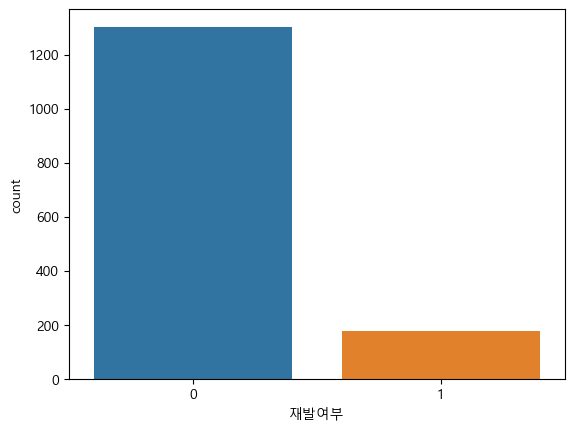

In [31]:
### 데이터 타입과 분포
## 목표 변수 :
sns.countplot(data=df_ROS_forpatient, x='재발여부')

In [43]:
forpatient_list = df_ROS_forpatient.describe().columns.to_list()
forpatient_list

['신장', '체중', '연령']

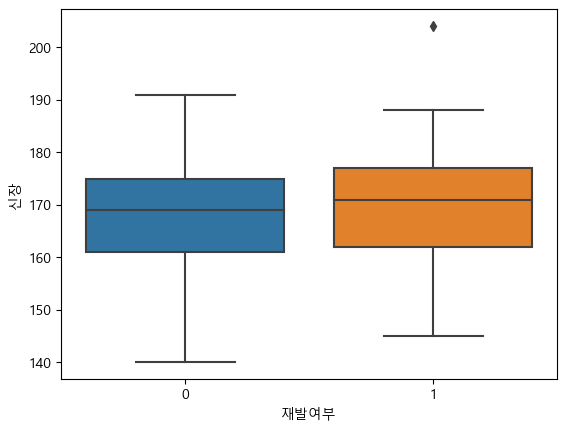

In [46]:
## x:연속형 / y:범주형
sns.boxplot(data=df_ROS_forpatient, x='재발여부', y='신장')
plt.show()

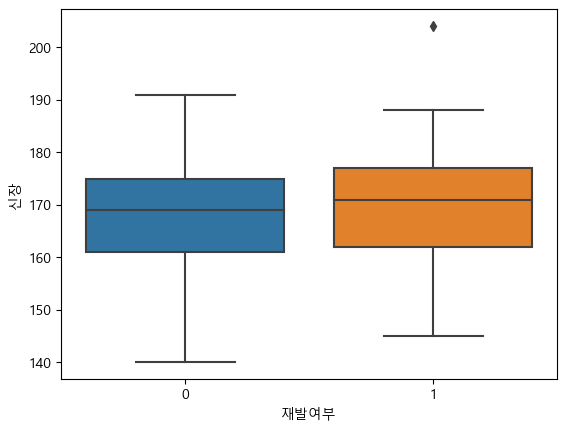

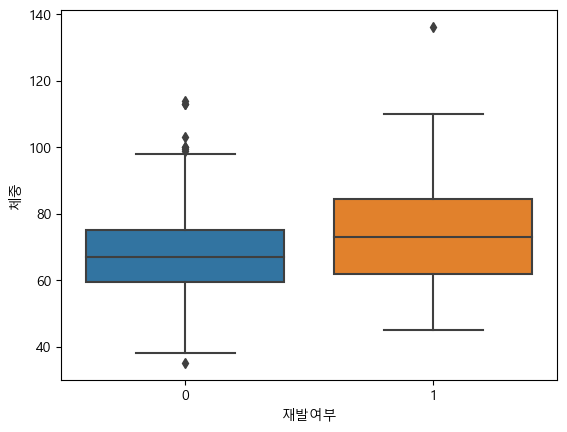

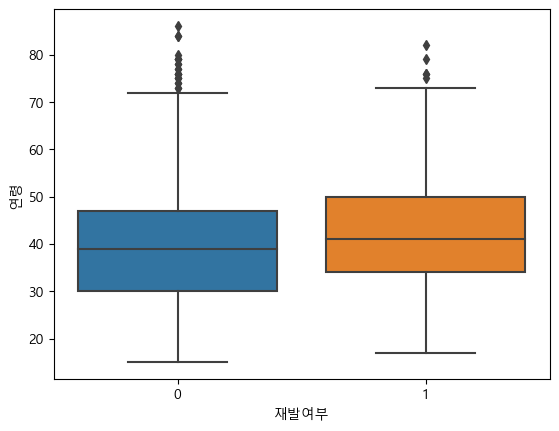

In [49]:
for item in forpatient_list:
    sns.boxplot(data=df_ROS_forpatient, x='재발여부', y=item)
    plt.show()

In [53]:
## x:범주형 / y:범주형
df_ROS_forpatient.drop(columns=['재발여부'])
forpatient_list = df_ROS_forpatient.describe(include=object).drop(columns=['재발여부']).columns.to_list()
forpatient_list

['성별', '심혈관질환', '흡연여부', '직업', '혈액형']

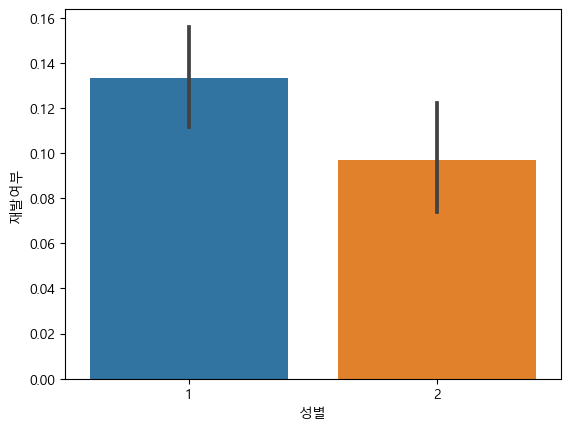

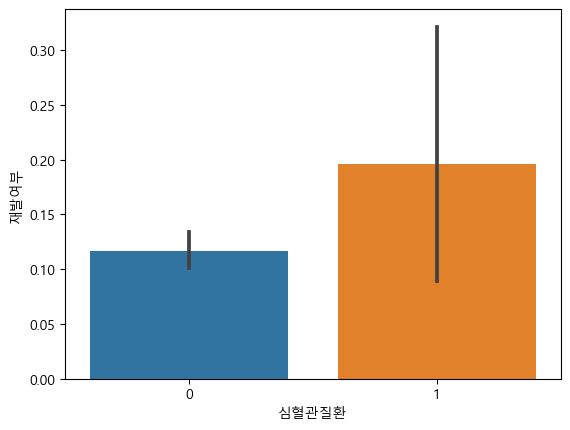

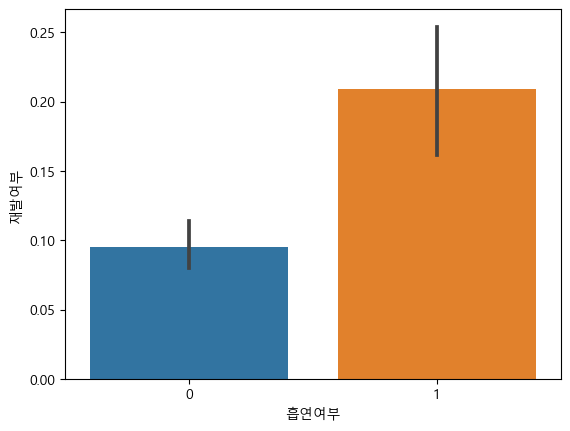

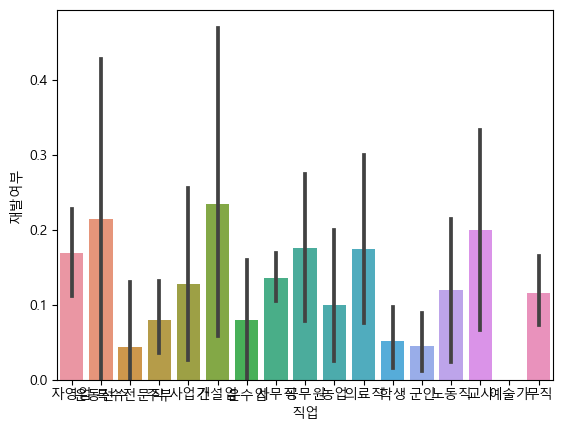

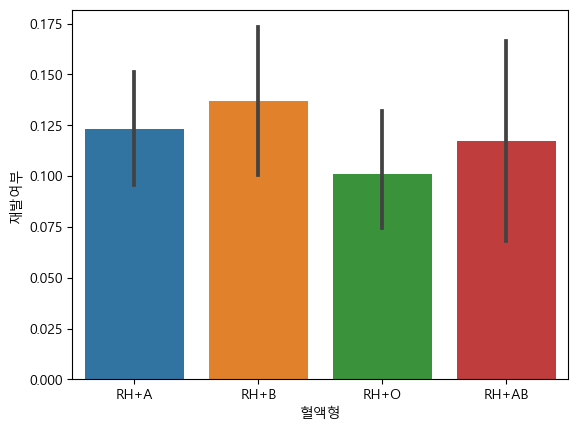

In [56]:
for item in forpatient_list:
    sns.barplot(data=df_ROS_forpatient, x=item, y='재발여부')
    plt.show()